In [ ]:
# regressao_modelos.py
# Script para prever óbitos com base em variáveis ambientais (2020–2023)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar os dados
df = pd.read_csv("C:/Users/Allyson/ENG4040/planilha_unificada.csv", sep=";")

# 2. Garantir que os dados numéricos estejam no formato correto
cols_numericas = ['OBITOS', 'AREA_DESMATADA_KM2', 'FRP', 'RISCOFOGO',
            'PRECIPITACAO', 'DIASEMCHUVA', 'pm2.5_atm']


for col in cols_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df.groupby("ano")[col].transform(lambda x: x.fillna(x.mean()))


# 4. Filtrar apenas os dados válidos
df = df.dropna(subset=cols_numericas)

# 5. Separar variáveis
X = df[['AREA_DESMATADA_KM2', 'FRP', 'RISCOFOGO', 'PRECIPITACAO', 'DIASEMCHUVA', 'pm2.5_atm']]
y = df['OBITOS']

# 6. Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 8. Modelos a serem avaliados
modelos = {
    "Regressão Linear": LinearRegression(),
    "Árvore de Regressão": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# 9. Avaliação dos modelos
resultados = []
predicoes = {}

In [21]:

# 6. Função para treinar, prever e avaliar modelos
def avaliar_modelo(nome, modelo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\nModelo: {nome}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"R²  : {r2:.2f}")
    return modelo

# 7. Treinar e avaliar todos os modelos
modelo_lr = avaliar_modelo("Regressão Linear", LinearRegression())
modelo_arvore = avaliar_modelo("Árvore de Regressão", DecisionTreeRegressor(random_state=42))
modelo_rf = avaliar_modelo("Random Forest", RandomForestRegressor(random_state=42))
modelo_xgb = avaliar_modelo("XGBoost", XGBRegressor(random_state=42))



Modelo: Regressão Linear
RMSE: 7.23
MAE : 3.75
R²  : -0.02

Modelo: Árvore de Regressão
RMSE: 7.48
MAE : 4.21
R²  : -0.09

Modelo: Random Forest
RMSE: 7.49
MAE : 4.22
R²  : -0.09

Modelo: XGBoost
RMSE: 7.48
MAE : 4.21
R²  : -0.09



Resultados com ajustes no pré-processamento:
                Modelo      RMSE       MAE        R²
0     Regressão Linear  7.234642  3.751225 -0.020938
1  Árvore de Regressão  7.475110  4.205880 -0.089935
2        Random Forest  7.485557  4.221629 -0.092983
3              XGBoost  7.475078  4.205848 -0.089925
4     Regressão Linear  7.234642  3.751225 -0.020938
5  Árvore de Regressão  7.475110  4.205880 -0.089935
6        Random Forest  7.485557  4.221629 -0.092983
7              XGBoost  7.475078  4.205848 -0.089925


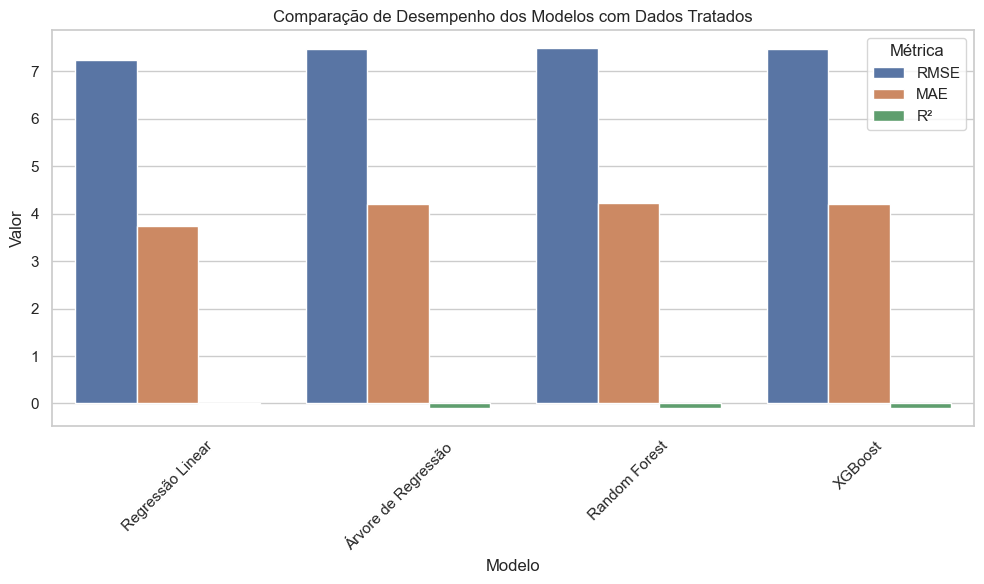

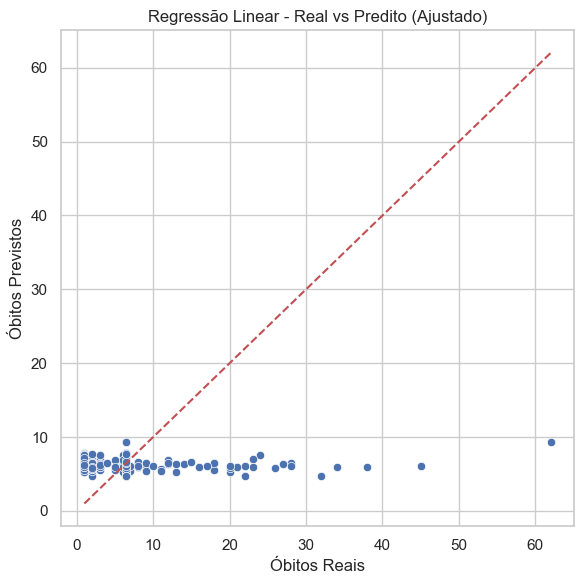

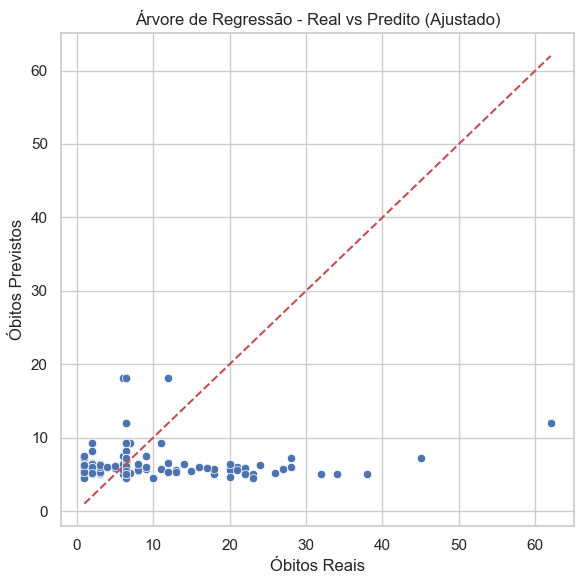

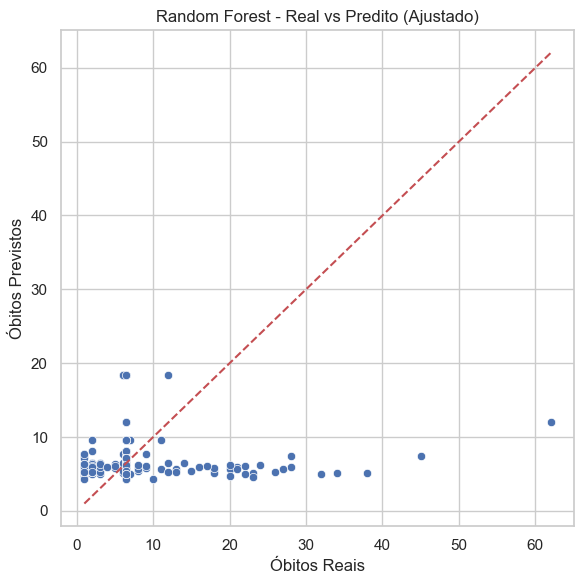

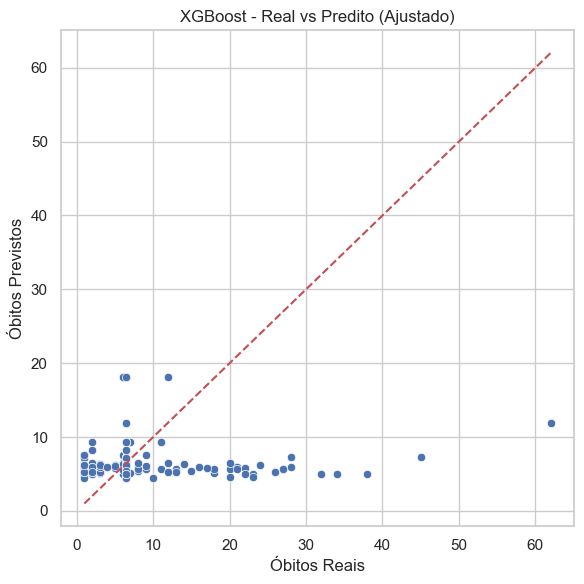

In [22]:
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    resultados.append([nome, rmse, mae, r2])
    predicoes[nome] = y_pred

# 10. Tabela de métricas
df_resultados = pd.DataFrame(resultados, columns=["Modelo", "RMSE", "MAE", "R²"])
print("\nResultados com ajustes no pré-processamento:")
print(df_resultados)

# 11. Gráfico comparativo
plt.figure(figsize=(10, 6))
sns.barplot(data=df_resultados.melt(id_vars="Modelo", var_name="Métrica", value_name="Valor"),
            x="Modelo", y="Valor", hue="Métrica")
plt.title("Comparação de Desempenho dos Modelos com Dados Tratados")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 12. Gráficos de Dispersão
for nome, y_pred in predicoes.items():
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Óbitos Reais")
    plt.ylabel("Óbitos Previstos")
    plt.title(f"{nome} - Real vs Predito (Ajustado)")
    plt.tight_layout()
    plt.show()
